In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df1=df

In [5]:
df["deck"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [6]:
df["deck_null"]=np.where(df["deck"].isnull(),1,0)

In [7]:
df["deck_null"]

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: deck_null, Length: 891, dtype: int32

In [8]:
df["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [9]:
grp=df.groupby("survived")
for i in grp:
    print(i)

(0,      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male   NaN      0      0   8.4583        Q   Third   
6           0       1    male  54.0      0      0  51.8625        S   First   
7           0       3    male   2.0      3      1  21.0750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
888         0       3  female   NaN      1      2  23.4500        S   Third   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive 

In [10]:
df.groupby(['survived'])["deck_null"].mean() #missing data not at random

survived
0    0.877960
1    0.602339
Name: deck_null, dtype: float64

In [11]:
df.deck_null

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: deck_null, Length: 891, dtype: int32

##missing at random

In [12]:
#all the methods of handling missing values
#1.replacing with mean,median,mode
#2.random sample imputation
#3.capturing NaN with a new feature
#4.end of distribution imputation
#5.Arbitary imputation
#6.frequent categories imputation



#mean , median , mode imputation

When should we apply mean/median Imputation?
Mean/median imputation has the assumption that the data are missing completly at random(MCAR).We solve this by replaicng The NaN with the most frequent occurence of the variable


In [13]:
data=df.drop(["survived","age","fare"],axis=1)

In [14]:
df=sns.load_dataset("titanic")

In [15]:
df1=df

In [16]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [17]:
l=["survived","fare","age"]

In [18]:
p=[]
for i in df.columns:
    if i not in l:
        p.append(i)

In [19]:
p

['pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [20]:
df.drop(p,axis=1,inplace=True)

In [21]:
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [22]:
#let us check the percentage of the missing values
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [23]:
def impute_nullvalues(data,variable,median):
    df[variable+"median"]=df[variable].fillna(median)

In [24]:
#finding median of the age column
median=df["age"].median()

In [25]:
impute_nullvalues(df,"age",median)

In [26]:
df.agemedian.isnull().sum()  #here we can see the null or NaN values are replaced with the median value of the data

0

In [27]:
print(df["age"].std())
print(df["agemedian"].std())

14.526497332334044
13.019696550973194


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

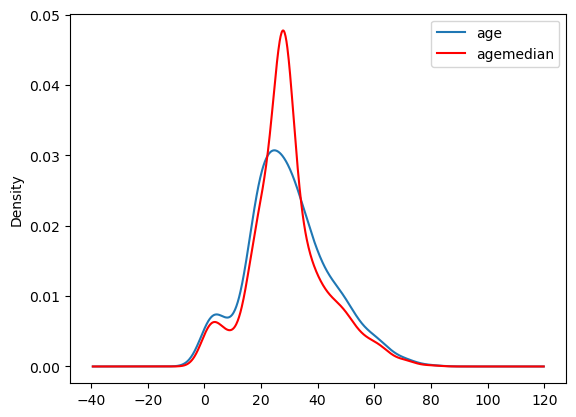

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.agemedian.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

In [31]:
##random sample imputation

<Figure size 640x480 with 0 Axes>

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [33]:
import pandas as pd
import seaborn as sns

In [50]:
df=sns.load_dataset("titanic")
l=['survived', 'age', 'fare']
p=[]
for i in df.columns:
    if i not in l:
        p.append(i)


In [51]:
l=['survived', 'age', 'fare']

In [52]:
p=[]
for i in df.columns:
    if i not in l:
        p.append(i)


In [55]:
df1=df

In [56]:
df.drop(p,axis=1,inplace=True)

In [57]:
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [63]:
df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [62]:
df["age"].isnull().sum()

177

In [65]:
df["age"][539]

22.0

In [73]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [70]:
median=df["age"].median()

In [74]:
impute_nan(df,"age",median)

In [75]:
df

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'DataFrame' object has no attribute 'Age_random'

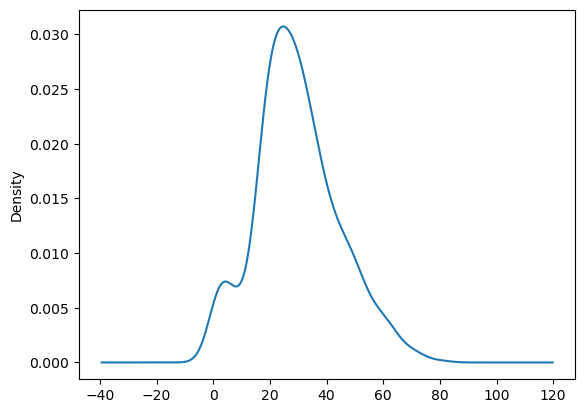

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)

df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

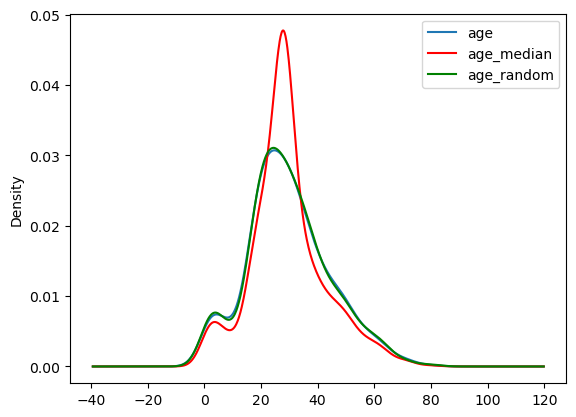

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

In [96]:
#capturing NaN values with new feature

##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [83]:
df=sns.load_dataset("titanic")
l=['survived', 'age', 'fare']
p=[]
for i in df.columns:
    if i not in l:
        p.append(i)
df.drop(p,axis=1,inplace=True)


In [84]:
import numpy as np

In [86]:
df.drop(p,axis=1,inplace=True)

In [87]:
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [89]:
df["age_nan"]=np.where(df["age"].isnull(),1,0)

In [90]:
df

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [91]:
df.age.median()

28.0

In [93]:
df.age.fillna(df.age.median,inplace=True)

In [94]:
df.head()

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [95]:
df.age.isnull().sum()

0

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

###end of distribution

In [97]:
df=sns.load_dataset("titanic")
l=['survived', 'age', 'fare']
p=[]
for i in df.columns:
    if i not in l:
        p.append(i)
df.drop(p,axis=1,inplace=True)


In [98]:
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [105]:
extreme=df.age.mean()+3*df.age.std()

<Axes: >

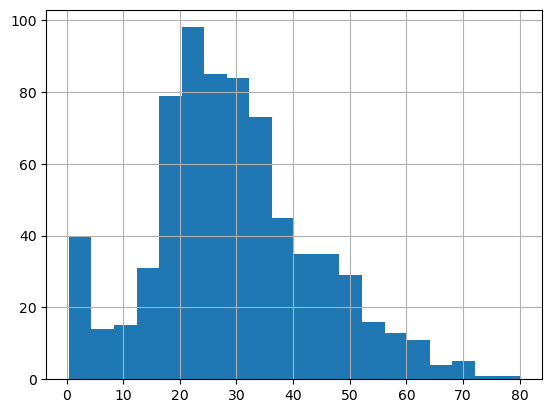

In [100]:
df.age.hist(bins=20)

In [101]:
import seaborn as sns

<Axes: xlabel='age'>

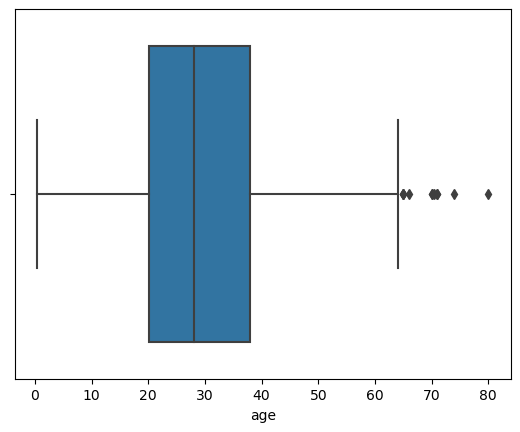

In [104]:

sns.boxplot(x=df["age"])

In [106]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [107]:
impute_nan(df,"age",df["age"].median(),extreme)

In [108]:
df

,survived,age,fare,age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000
